# Sales Forecasting

## Business Understanding

### Latar Belakang

Dalam dunia bisnis yang kompetitif, memahami pola penjualan dan meramalkan permintaan di masa depan adalah kunci untuk mencapai kesuksesan. Dalam dunia bisnis, penjualan pasti akan mengalami fluktuasi, fluktuasi ini dapat dipengaruhi oleh berbagai faktor, termasuk musiman, tren pasar, dan perilaku konsumen. Oleh karena itu, prediksi penjualan yang akurat sangat penting untuk pengambilan keputusan strategis.

### Tujuan

Tujuan dari proyek ini adalah untuk memprediksi total penjualan selama beberapa bulan ke depan. Dengan memanfaatkan data penjualan historis dan analisis variabel terkait, laporan ini bertujuan untuk memberikan wawasan yang berharga untuk merencanakan strategi bisnis yang lebih efektif. Prediksi yang tepat akan membantu dalam:
1. **Perencanaan Inventaris** :  Memastikan bahwa stok produk mencukupi untuk memenuhi permintaan pelanggan, sehingga mengurangi risiko kehabisan stok atau kelebihan stok.
2. **Pengelolaan Cash Flow** : Memungkinkan perusahaan untuk mengatur aliran kas dengan lebih baik berdasarkan proyeksi pendapatan dari penjualan.
3. ***Strategi Pemasaran** : Memberikan informasi yang diperlukan untuk merancang kampanye pemasaran yang tepat waktu dan efektif, sesuai dengan periode permintaan tinggi.

### Kriteria Keberhasilan

**Akurasi Prediksi**: Metrik seperti RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), dan R2 (R Squared) akan digunakan untuk mengevaluasi seberapa baik model dapat memprediksi total penjualan.

## Data Understanding

### Sumber Data

Data yang digunakan merupakan data penjualan dari perusahaan furniture. Data ini diambil dari kaggle melalui tautan berikut [Store Sales Forecasting Dataset](https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset). Dataset ini mencakup informasi penjualan historis yang relevan untuk analisis, yang diperoleh dalam format csv

### Deskripsi Dataset

Dataset yang digunakan memiliki struktur sebagai berikut:
- Jumlah baris : 2121 Baris
- Jumlah kolom : 21 Kolom

### Definisi Skema Dataset

- **Row ID**: ID unik untuk setiap baris.
- **Order ID**: ID unik untuk setiap pesanan penjualan.
- **Order Date**: Tanggal ketika pesanan penjualan dibuat.
- **Ship Date**: Tanggal ketika pesanan dikirim.
- **Ship Mode**: Metode pengiriman yang digunakan untuk pesanan.
- **Customer ID**: ID unik untuk pelanggan.
- **Customer Name**: Nama pelanggan.
- **Segment**: Klasifikasi segmen dari pelanggan (misalnya, Konsumen, Korporat, Kantor Rumah).
- **Country**: Negara tempat penjualan terjadi.
- **City**: Kota tempat penjualan terjadi.
- **State**: Provinsi atau negara bagian tempat penjualan terjadi.
- **Postal Code**: Kode pos untuk lokasi penjualan.
- **Region**: Wilayah geografis tempat penjualan terjadi (misalnya, Utara, Timur, Barat, Selatan).
- **Product ID**: ID unik untuk produk.
- **Category**: Kategori utama dari produk.
- **Sub-Category**: Sub-kategori dari produk.
- **Product Name**: Nama produk.
- **Sales**: Total jumlah penjualan untuk setiap pesanan.
- **Quantity**: Jumlah produk yang dijual dalam pesanan.
- **Discount**: Diskon yang diterapkan pada pesanan.
- **Profit**: Laba yang diperoleh dari pesanan.

### EDA (Exploratory Data Analysis)

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [242]:
store_sale = pd.read_csv('dataset.csv', encoding='latin1')
store_sale.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [243]:
print("jumlah unique value untuk setiap kolom")
for colomn in store_sale.columns:
    unique_values = store_sale[colomn].nunique()
    print(f"{colomn} : {unique_values}")

jumlah unique value untuk setiap kolom
Row ID : 2121
Order ID : 1764
Order Date : 889
Ship Date : 960
Ship Mode : 4
Customer ID : 707
Customer Name : 707
Segment : 3
Country : 1
City : 371
State : 48
Postal Code : 454
Region : 4
Product ID : 375
Category : 1
Sub-Category : 4
Product Name : 380
Sales : 1636
Quantity : 14
Discount : 11
Profit : 1777


#### Melihat Tren Penjualan Berdasarkan Bulan

In [244]:
tren = store_sale.copy()
tren = tren[['Order Date', 'Sales']]
tren['Order Date'] = pd.to_datetime(tren['Order Date']).dt.to_period("M")
tren = tren.groupby('Order Date')["Sales"].sum().reset_index()
tren['Order Date'] = tren['Order Date'].dt.to_timestamp()

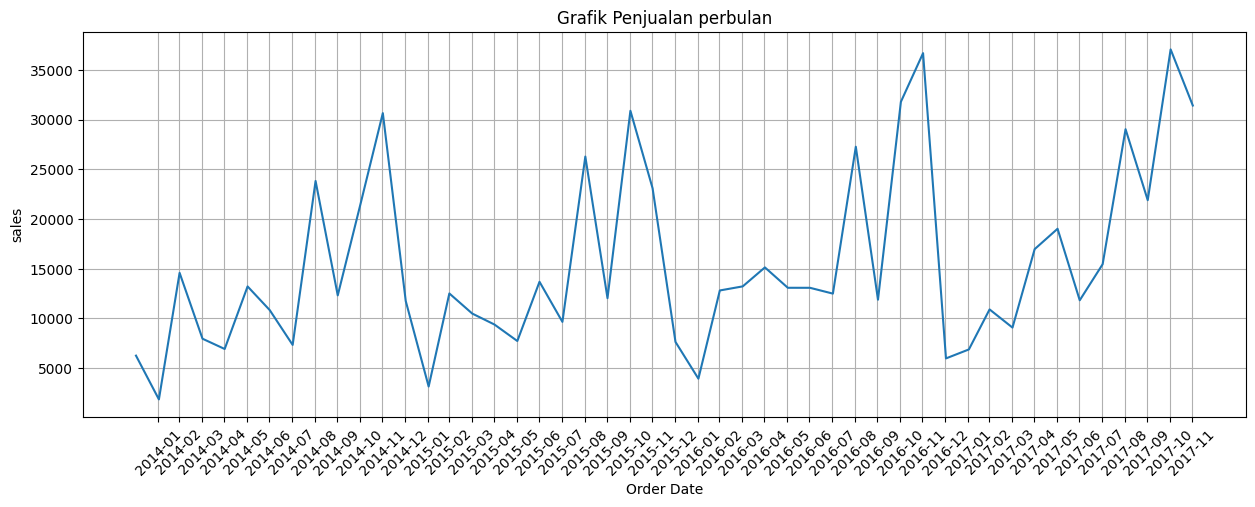

In [245]:
plt.figure(figsize=(15, 5))
plt.plot(tren['Order Date'], tren['Sales'])
months = pd.date_range(start=tren['Order Date'].min(), end=tren['Order Date'].max(), freq='M')
plt.xticks(months, [m.strftime('%Y-%m') for m in months], rotation=45)
plt.xlabel('Order Date')
plt.ylabel('sales')
plt.title("Grafik Penjualan perbulan")
plt.grid(True)
plt.show()

Bisa dilihat pada grafik, Penjualan meningkat terjadi pada periode Oktober dan November. Dan penjualan mengalami penurunan pada bulan Desember. Dari Data ini bisa disimpulkan bahwa penjualan meningkat pada musim kemarau(fall) dan menurun pada musin salju(winter)

#### Melihat Top 10 State dengan Orderan Terbanyak

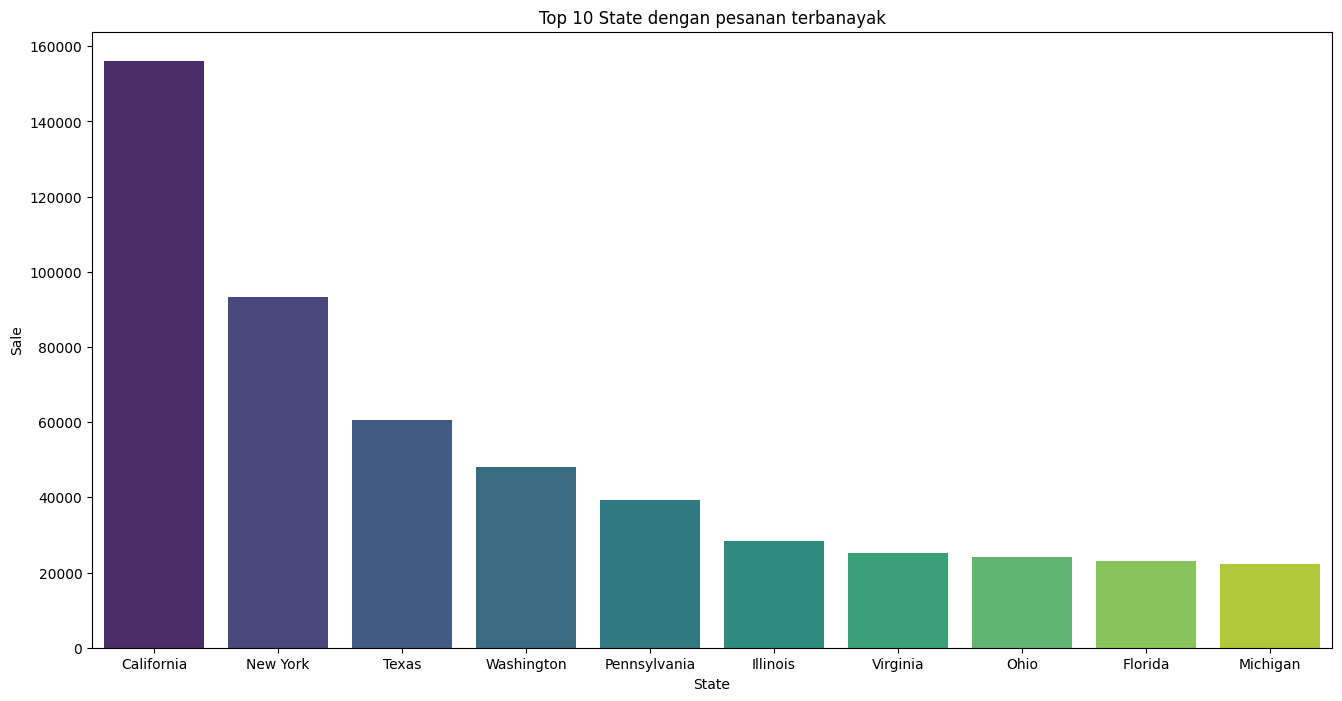

In [246]:
state_sale = store_sale.groupby('State')["Sales"].sum().reset_index()
top10_state = state_sale.sort_values(by="Sales", ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(x = 'State', y='Sales', data=top10_state, hue='State', palette='viridis')
plt.xlabel("State")
plt.ylabel("Sale")
plt.title("Top 10 State dengan pesanan terbanayak")
plt.show()

#### Melihat Top 10 Kota dengan Orderan Terbanyak

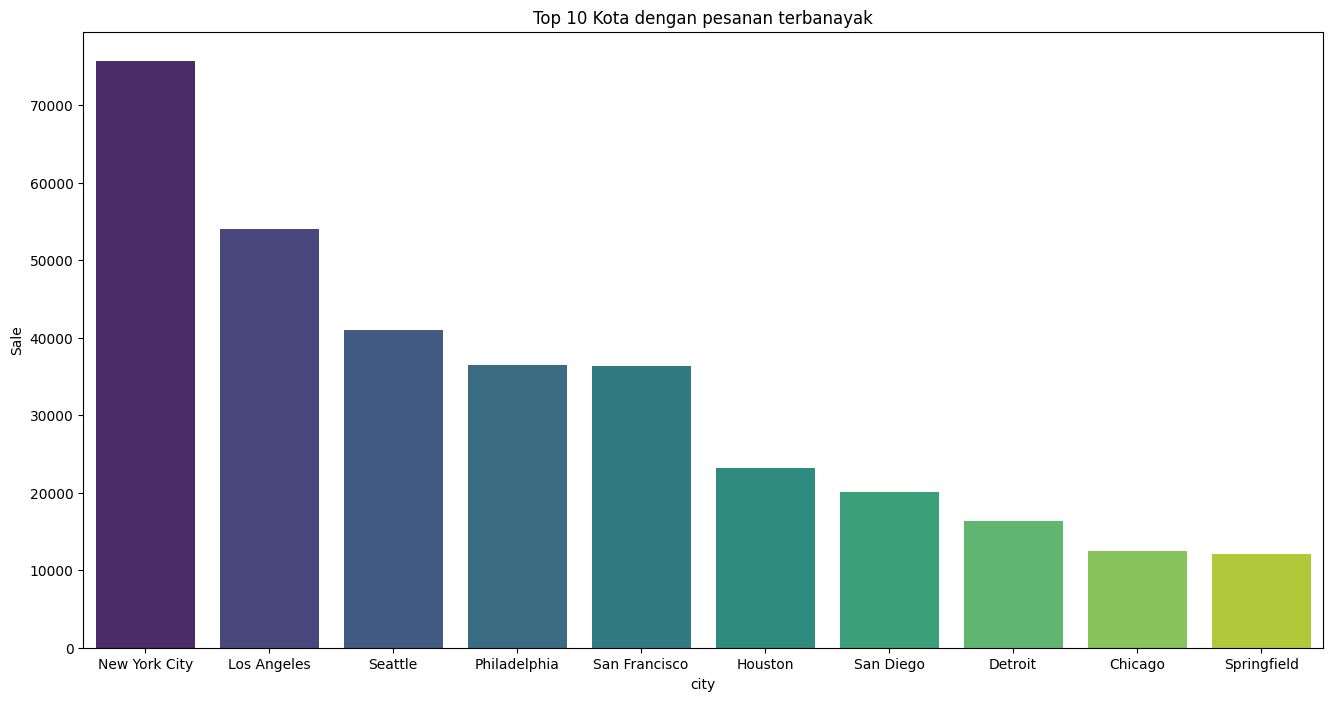

In [247]:
city_sale = store_sale.groupby('City')["Sales"].sum().reset_index()
top10_city = city_sale.sort_values(by="Sales", ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(x = 'City', y='Sales', data=top10_city, hue="City", palette='viridis')
plt.xlabel("city")
plt.ylabel("Sale")
plt.title("Top 10 Kota dengan pesanan terbanayak")
plt.show()

#### Melihat Perbandingan Penjualan antar region

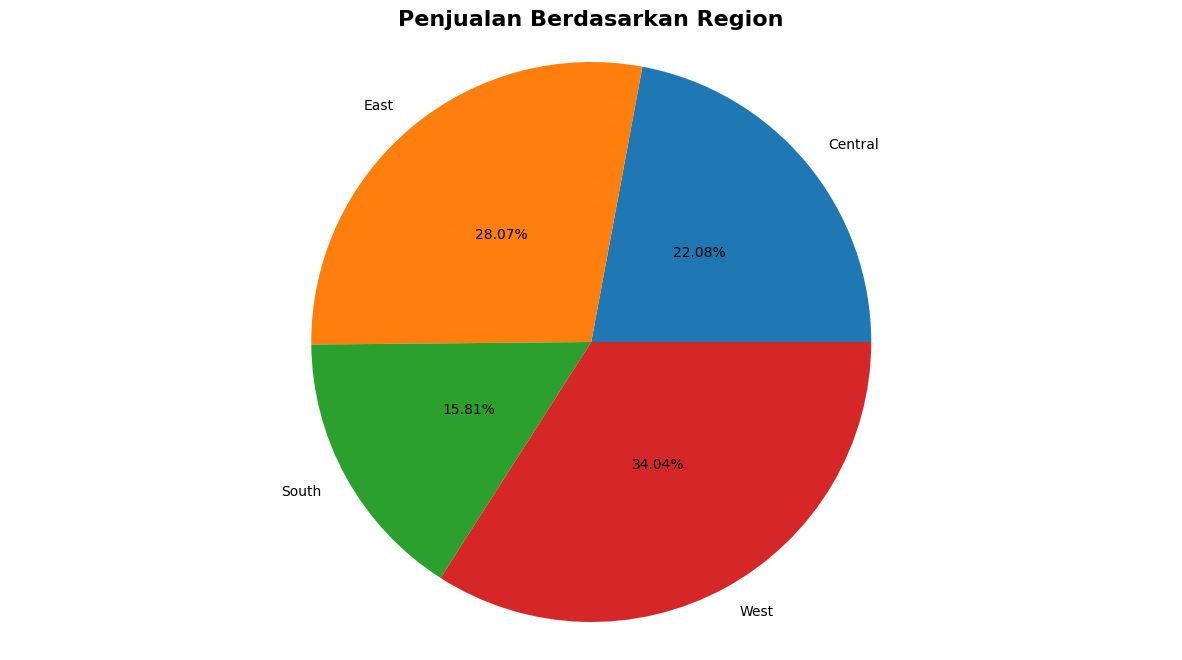

In [248]:
Region_sale = store_sale.groupby("Region")["Sales"].sum().reset_index()
plt.figure(figsize=(15,8))
plt.pie(Region_sale["Sales"], labels=Region_sale["Region"], autopct="%1.2f%%", pctdistance=0.5)
plt.title("Penjualan Berdasarkan Region", fontweight="bold", fontsize="16")
plt.axis("equal")
plt.show()

#### Melihat Perbandingan banyak sub-kategori yang dibeli

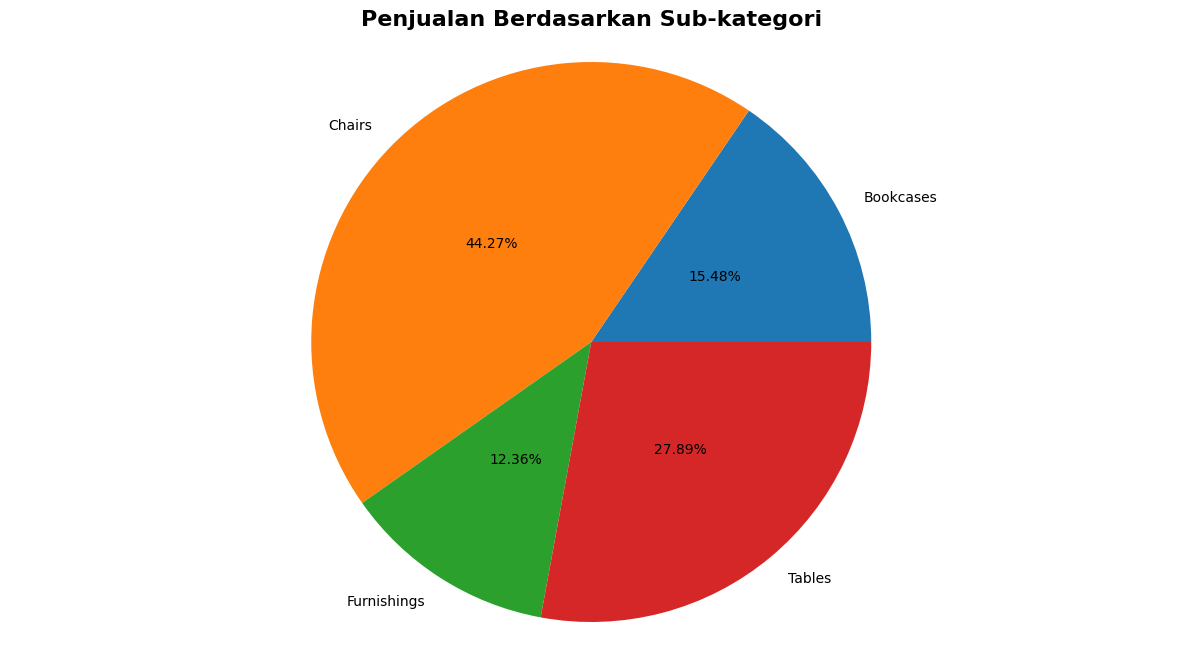

In [249]:
sub = store_sale.groupby("Sub-Category")["Sales"].sum().reset_index()
plt.figure(figsize=(15,8))
plt.pie(sub["Sales"], labels=sub["Sub-Category"], autopct="%1.2f%%", pctdistance=0.5)
plt.title("Penjualan Berdasarkan Sub-kategori", fontweight="bold", fontsize="16")
plt.axis("equal")
plt.show()

#### Melihat Top 10 Produk yang banyak dibeli

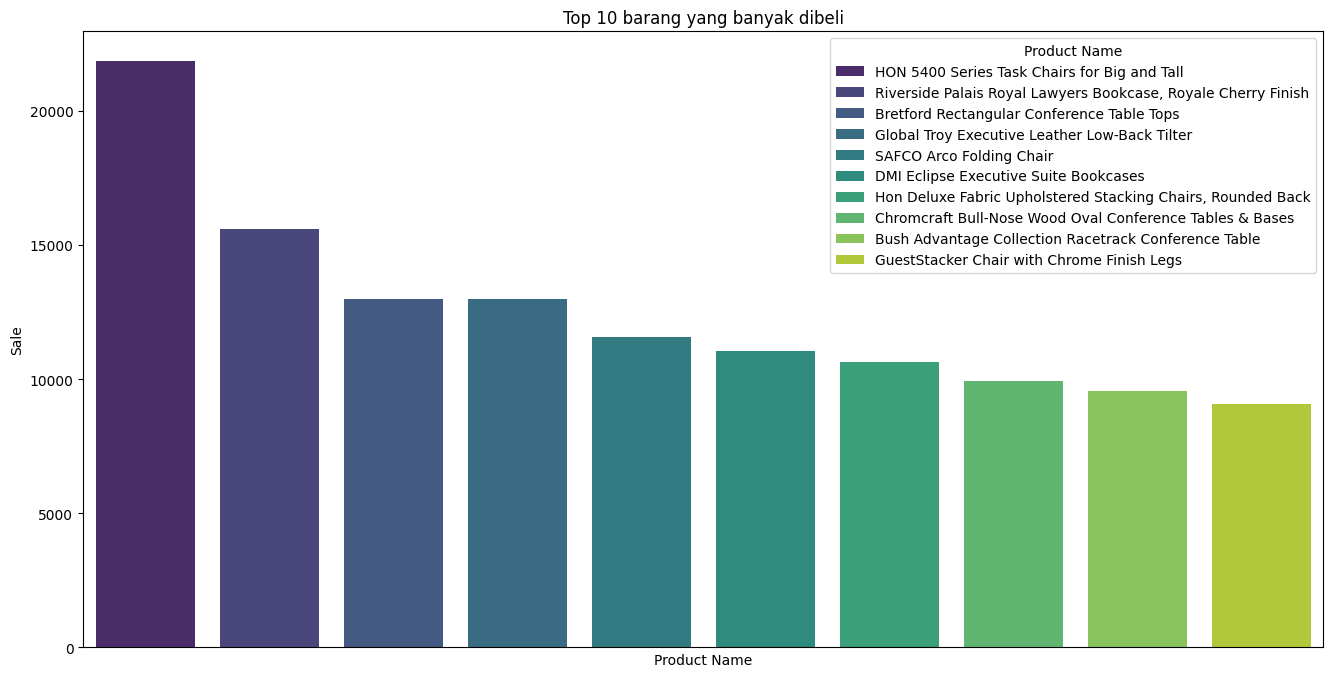

In [250]:
product = store_sale.groupby("Product Name")["Sales"].sum().reset_index()
top10_product = product.sort_values(by="Sales", ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(x = 'Product Name', y='Sales', data=top10_product, hue="Product Name", palette="viridis", legend=True)
# plt.xlabel("Product Name")
plt.xticks([])
plt.ylabel("Sale")
plt.title("Top 10 barang yang banyak dibeli")
plt.show()

#### Melihat Perbandingan antara Profit vs Sales

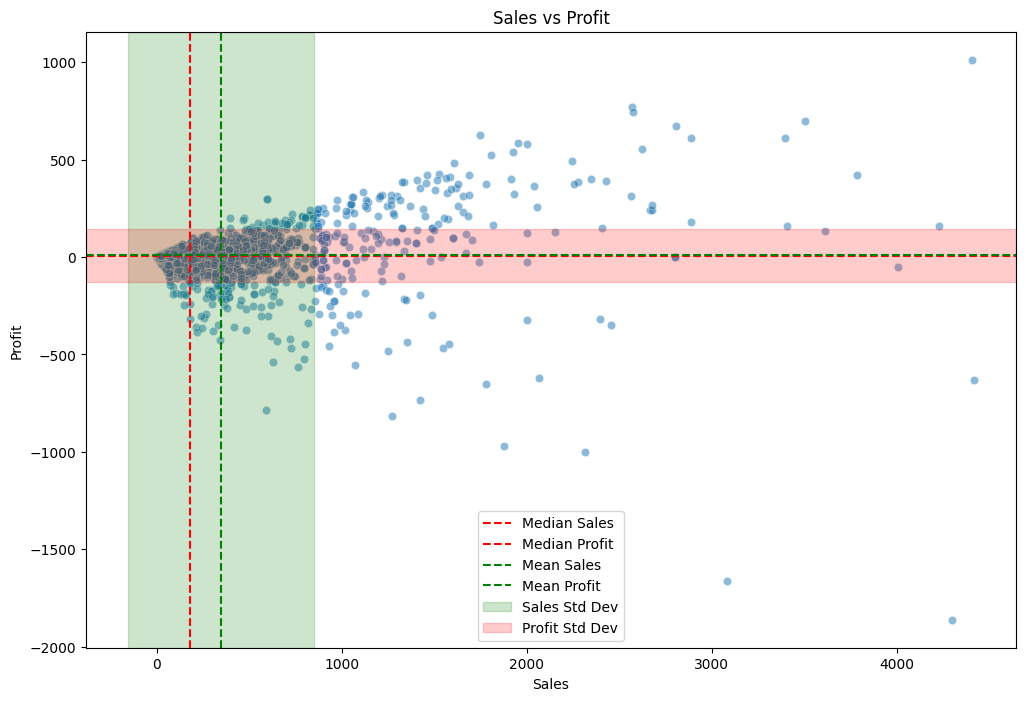

In [251]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Sales", y="Profit", data=store_sale, alpha=0.5)

# garis median dan rata-rata
plt.axvline(store_sale["Sales"].median(), color='r', linestyle='--', label='Median Sales')
plt.axhline(store_sale["Profit"].median(), color='r', linestyle='--', label='Median Profit')
plt.axvline(store_sale["Sales"].mean(), color='g', linestyle='--', label='Mean Sales')
plt.axhline(store_sale["Profit"].mean(), color='g', linestyle='--', label='Mean Profit')

# standard diviasi
plt.axvspan(store_sale["Sales"].mean() - store_sale["Sales"].std(), store_sale["Sales"].mean() + store_sale["Sales"].std(), alpha=0.2, color='green', label='Sales Std Dev')
plt.axhspan(store_sale["Profit"].mean() - store_sale["Profit"].std(), store_sale["Profit"].mean() + store_sale["Profit"].std(), alpha=0.2, color='red', label='Profit Std Dev')

plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()
plt.show()

Bisa dilihat ada beberapa penjualan yang tidak mendapatkan profit, bahkan ada penjualan yang profitnya minus

## Data Preparation

##### Pengecekan missing value dan duplicate value

In [252]:
store_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

tidak ada missing value

In [253]:
duplicate = store_sale[store_sale.duplicated()]
duplicate

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Tidak ada duplicate value

### Ambil kolom yang akan digunakan untuk proses forecasting

In [254]:
data = store_sale.loc[:, ['Order Date', 'Sales']]
data.head(10)

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840
5,7/16/2017,71.3720
6,9/25/2015,1044.6300
7,9/17/2015,3083.4300
8,9/17/2015,124.2000
9,12/8/2016,190.9200


### Proses Mengubah Format Kolom Agar Bisa Digunakan Untuk Forecasting

In [255]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Order Date').sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()
monthly_sales.head()

,Order Date,Sales
0,2014-01-01,6242.525
1,2014-02-01,1839.658
2,2014-03-01,14573.956
3,2014-04-01,7944.837
4,2014-05-01,6912.787


In [256]:
# Melihat perbedaan dari bulan sebelumnya
monthly_sales['Sales Diff'] = monthly_sales['Sales'].diff()
monthly_sales.head()

,Order Date,Sales,Sales Diff
0,2014-01-01,6242.525,NaN
1,2014-02-01,1839.658,-4402.867
2,2014-03-01,14573.956,12734.298
3,2014-04-01,7944.837,-6629.119
4,2014-05-01,6912.787,-1032.050


In [257]:
# Karena ada nilai NaN di drop
monthly_sales = monthly_sales.dropna()

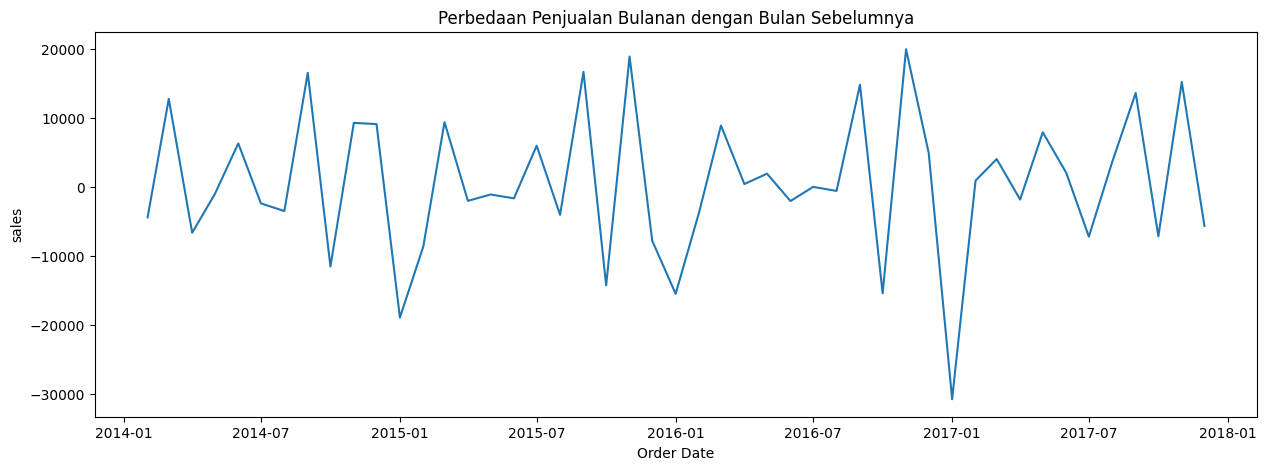

In [258]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales Diff'])
plt.xlabel('Order Date')
plt.ylabel('sales')
plt.title("Perbedaan Penjualan Bulanan dengan Bulan Sebelumnya")
plt.show()

In [259]:
model_data = monthly_sales.drop(['Order Date', 'Sales'], axis=1)
for i in range(0, 12):
    col_name = 'Month_' + str(i+1)
    model_data[col_name] = model_data['Sales Diff'].shift(i+1)

model_data = model_data.dropna().reset_index(drop=True)
model_data.head()

,Sales Diff,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-8605.5676,-18906.0249,9081.0938,9260.6257,-11512.2338,16496.1343,-3500.7045,-2385.0746,6293.3386,-1032.0500,-6629.1190,12734.2980,-4402.8670
1,9365.4090,-8605.5676,-18906.0249,9081.0938,9260.6257,-11512.2338,16496.1343,-3500.7045,-2385.0746,6293.3386,-1032.0500,-6629.1190,12734.2980
2,-2024.0845,9365.4090,-8605.5676,-18906.0249,9081.0938,9260.6257,-11512.2338,16496.1343,-3500.7045,-2385.0746,6293.3386,-1032.0500,-6629.1190
3,-1100.7480,-2024.0845,9365.4090,-8605.5676,-18906.0249,9081.0938,9260.6257,-11512.2338,16496.1343,-3500.7045,-2385.0746,6293.3386,-1032.0500
4,-1660.7715,-1100.7480,-2024.0845,9365.4090,-8605.5676,-18906.0249,9081.0938,9260.6257,-11512.2338,16496.1343,-3500.7045,-2385.0746,6293.3386


### Pembagian Data Latih dan Data Uji

In [260]:
train_data = model_data[:-12]
test_data = model_data[-12:]
scalar = MinMaxScaler(feature_range=(-1,1))
scalar.fit(train_data)

MinMaxScaler(feature_range=(-1, 1))

In [261]:
train_data = scalar.transform(train_data)
test_data = scalar.transform(test_data)
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()

### Persiapan Data Lainnya Untuk Proses Evaluasi

In [262]:
#dataset prediksi, 12 bulan terakhir dari dataframe
order_date = monthly_sales['Order Date'][-12:].reset_index(drop=True)
predict_frame = pd.DataFrame(order_date)

In [263]:
# Digunakan untuk pembanding dengan Hasil Prediksi nantinya
act_sale = monthly_sales['Sales'][-13:].to_list()

## Modelling

### Linear Regression

#### Pembuatan Model dengan Pencarian Hyperparameter yang bagus

In [264]:
lr = LinearRegression()
param_grid = {
    'fit_intercept': [True, False]
}
best_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [265]:
best_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [266]:
y_pred = best_lr.predict(X_test)

#### Melakukan Perhitungan Confidence Interval

In [267]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

In [268]:
X_test_sm = sm.add_constant(X_test)
predictions = results.get_prediction(X_test_sm)
predictions

In [269]:
pred_summary = predictions.summary_frame(alpha=0.05)
lower_bound = pred_summary['obs_ci_lower']
upper_bound = pred_summary['obs_ci_upper']

In [270]:
lower_bound = scalar.inverse_transform(np.column_stack((lower_bound, X_test)))
upper_bound = scalar.inverse_transform(np.column_stack((upper_bound, X_test)))

#### Evaluasi Model

In [271]:
y_pred = y_pred.reshape(-1, 1)
y_pred_test = np.concatenate([y_pred, X_test], axis=1)
y_pred_test = scalar.inverse_transform(y_pred_test)

In [272]:
result = []
upper = []
lower = []
for i in range(0, len(y_pred_test)):
    result.append(y_pred_test[i][0] + act_sale[i])
    upper.append(upper_bound[i][0] + act_sale[i])
    lower.append(lower_bound[i][0] + act_sale[i])
lr_pred_series = pd.Series(result, name='Linear Prediction')
upper_series = pd.Series(upper, name="Upper Bound")
lower_series = pd.Series(lower, name="Lower Bound")

predict_frame = predict_frame.merge(lr_pred_series, left_index=True, right_index=True)
predict_frame = predict_frame.merge(upper_series, left_index=True, right_index=True)
predict_frame = predict_frame.merge(lower_series, left_index=True, right_index=True)

In [273]:
rmse = np.sqrt(mean_squared_error(predict_frame['Linear Prediction'], monthly_sales['Sales'][-12:]))
mae = mean_absolute_error(predict_frame['Linear Prediction'], monthly_sales['Sales'][-12:])
r2 = r2_score(predict_frame['Linear Prediction'], monthly_sales['Sales'][-12:])
print("rmse: ", rmse)
print("mae: ", mae)
print("R2 : ", r2)

rmse:  4956.17338799873
mae:  4446.337772569727
R2 :  0.759578893746562


#### Visualisasi Hasil Model

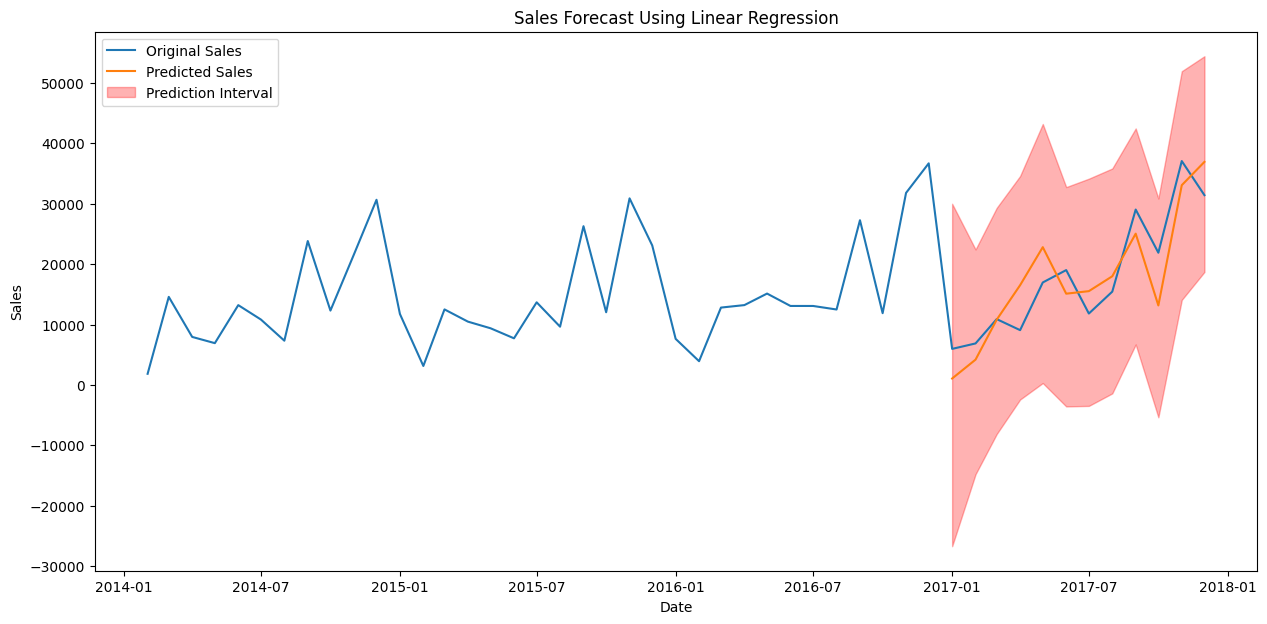

In [274]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'],label="Original Sales")
plt.plot(predict_frame['Order Date'], predict_frame['Linear Prediction'], label="Predicted Sales")
plt.fill_between(
    predict_frame['Order Date'], 
    predict_frame['Upper Bound'], 
    predict_frame['Lower Bound'], 
    color='red', 
    alpha=0.3, 
    label="Prediction Interval"
)
plt.title("Sales Forecast Using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

### Random Forest Regressor

In [275]:
from sklearn.ensemble import RandomForestRegressor

#### Pembuatan Model dengan Pencarian Hyperparameter yang bagus

In [276]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [277]:
rf = RandomForestRegressor()
rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [278]:
rf =rf.best_estimator_
rf_pred = rf.predict(X_test)

#### Penentuan Confidence Interval

In [ ]:
import forestci as fci
Confidence_rf = fci.random_forest_error(rf, X_train.shape, X_test)
Confidence_rf

In [280]:
upper_bound_rf = rf_pred + 1.96 * np.sqrt(Confidence_rf)
lower_bound_rf = rf_pred - 1.96 * np.sqrt(Confidence_rf)

In [281]:
lower_bound_rf = pd.Series(lower_bound_rf, name="lower_bound_rf")
upper_bound_rf = pd.Series(upper_bound_rf, name="upper_bound_rf")

In [282]:
lower_bound_rf = scalar.inverse_transform(np.column_stack((lower_bound_rf, X_test)))
upper_bound_rf = scalar.inverse_transform(np.column_stack((upper_bound_rf, X_test)))

#### Evaluasi Model

In [283]:
rf_pred = rf_pred.reshape(-1,1)
rf_pred_test_set = np.concatenate([rf_pred,X_test], axis=1)
rf_pred_test_set = scalar.inverse_transform(rf_pred_test_set)

In [284]:
result_list = []
upper_rf = []
lower_rf = []
for i in range(0, len(rf_pred_test_set)):
    result_list.append(rf_pred_test_set[i][0] + act_sale[i])
    upper_rf.append(upper_bound_rf[i][0] + act_sale[i])
    lower_rf.append(lower_bound_rf[i][0] + act_sale[i])
rf_pred_series = pd.Series(result_list, name='rf_pred')
upper_series_rf = pd.Series(upper_rf, name="Upper Bound_rf")
lower_series_rf = pd.Series(lower_rf, name="Lower Bound_rf")

predict_frame = predict_frame.merge(rf_pred_series, left_index=True, right_index=True)
predict_frame = predict_frame.merge(upper_series_rf, left_index=True, right_index=True)
predict_frame = predict_frame.merge(lower_series_rf, left_index=True, right_index=True)

In [285]:
rf_rmse = np.sqrt(mean_squared_error(predict_frame['rf_pred'], monthly_sales['Sales'][-12:]))
rf_mae = mean_absolute_error(predict_frame['rf_pred'], monthly_sales['Sales'][-12:])
rf_r2 = r2_score(predict_frame['rf_pred'], monthly_sales['Sales'][-12:])
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest MAE: ', rf_mae)
print('Random Forest R2 Score: ', rf_r2)

Random Forest RMSE:  7502.790933719734
Random Forest MAE:  5070.713648041373
Random Forest R2 Score:  0.5052065063246127


#### Visualisasi Hasil Model

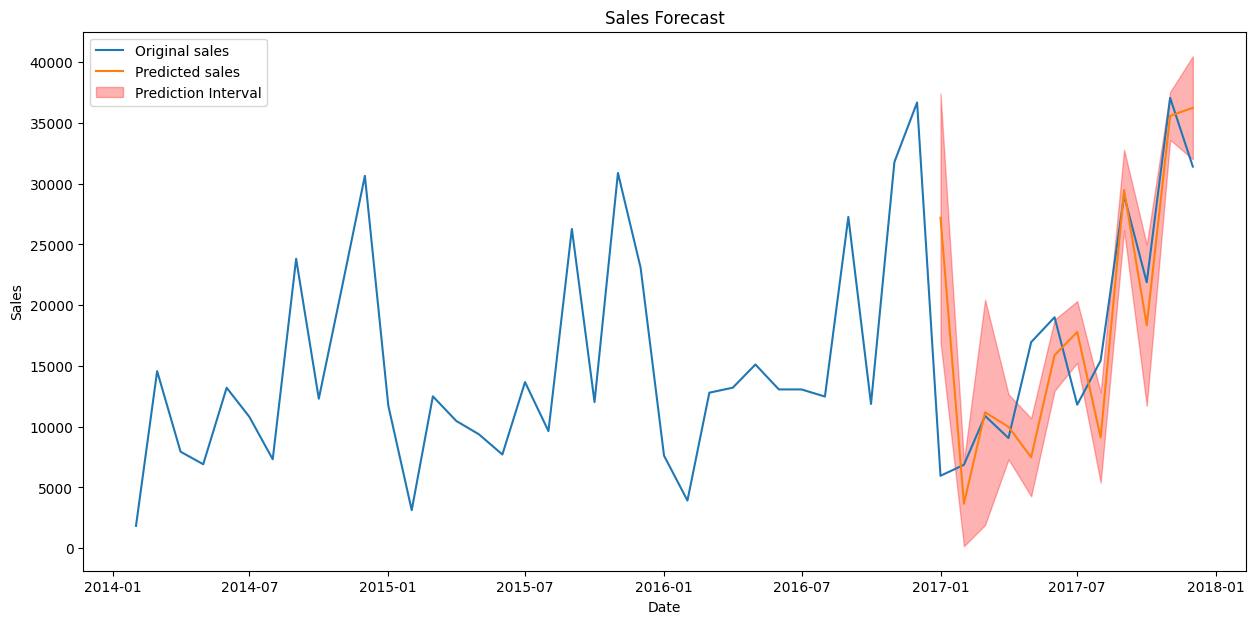

In [286]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label="Original sales")
plt.plot(predict_frame['Order Date'], predict_frame['rf_pred'], label="Predicted sales")
plt.fill_between(
    predict_frame['Order Date'], 
    predict_frame['Upper Bound_rf'], 
    predict_frame['Lower Bound_rf'], 
    color='red', 
    alpha=0.3, 
    label="Prediction Interval"
)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

### XGBoost

In [287]:
import xgboost as xgb

#### Pembuatan Model dengan Pencarian Hyperparameter yang bagus

In [288]:
xgb_model = xgb.XGBRegressor()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [289]:
xgb_model = grid_search_xgb.best_estimator_
xgb_pred = xgb_model.predict(X_test)

#### Penentuan Confidence Interval

In [290]:
n_iterations = 100 
predictions = []

In [291]:
for i in range(n_iterations):
    # Create a bootstrapped dataset
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_resampled, y_resampled = X_train[indices], y_train[indices]
    
    # Train an XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X_resampled, y_resampled)
    
    # Predict on test data
    preds = model.predict(X_test)
    predictions.append(preds)

In [292]:
predictions = np.array(predictions)

In [293]:
# Calculate the mean and standard deviation of the predictions
mean_preds = np.mean(predictions, axis=0)
std_preds = np.std(predictions, axis=0)

In [294]:
# Confidence intervals
lower_bound_xgb = mean_preds - 1.96 * std_preds
upper_bound_xgb = mean_preds + 1.96 * std_preds

In [295]:
lower_bound_xgb = pd.Series(lower_bound_xgb, name="lower_bound_xgb")
upper_bound_xgb = pd.Series(upper_bound_xgb, name="upper_bound_xgb")

In [296]:
lower_bound_xgb = scalar.inverse_transform(np.column_stack((lower_bound_xgb, X_test)))
upper_bound_xgb = scalar.inverse_transform(np.column_stack((upper_bound_xgb, X_test)))

#### Evaluasi Model

In [297]:
xgb_pred = xgb_pred.reshape(-1,1)
xgb_pred_test_set = np.concatenate([xgb_pred,X_test], axis=1)
xgb_pred_test_set = scalar.inverse_transform(xgb_pred_test_set)

In [298]:
result_list = []
upper_xgb = []
lower_xgb = []
for index in range(0, len(xgb_pred_test_set)):
    result_list.append(xgb_pred_test_set[index][0] + act_sale[index])
    upper_xgb.append(upper_bound_xgb[index][0] + act_sale[index])
    lower_xgb.append(lower_bound_xgb[index][0] + act_sale[index])
    
xgb_pred_series = pd.Series(result_list, name='xgb_pred')
upper_series_xgb = pd.Series(upper_xgb, name="Upper Bound_xgb")
lower_series_xgb = pd.Series(lower_xgb, name="Lower Bound_xgb")

predict_frame = predict_frame.merge(xgb_pred_series, left_index=True, right_index=True)
predict_frame = predict_frame.merge(upper_series_xgb, left_index=True, right_index=True)
predict_frame = predict_frame.merge(lower_series_xgb, left_index=True, right_index=True)

In [299]:
xgb_rmse = np.sqrt(mean_squared_error(predict_frame['xgb_pred'], monthly_sales['Sales'][-12:]))
xgb_mae = mean_absolute_error(predict_frame['xgb_pred'], monthly_sales['Sales'][-12:])
xgb_r2 = r2_score(predict_frame['xgb_pred'], monthly_sales['Sales'][-12:])
print('XGB RMSE: ', xgb_rmse)
print('XGB MAE: ', xgb_mae)
print('XGB R2 Score: ', xgb_r2)

XGB RMSE:  7141.584470698475
XGB MAE:  5241.095543724445
XGB R2 Score:  0.5680077076006573


#### Visualisasi Hasil Model

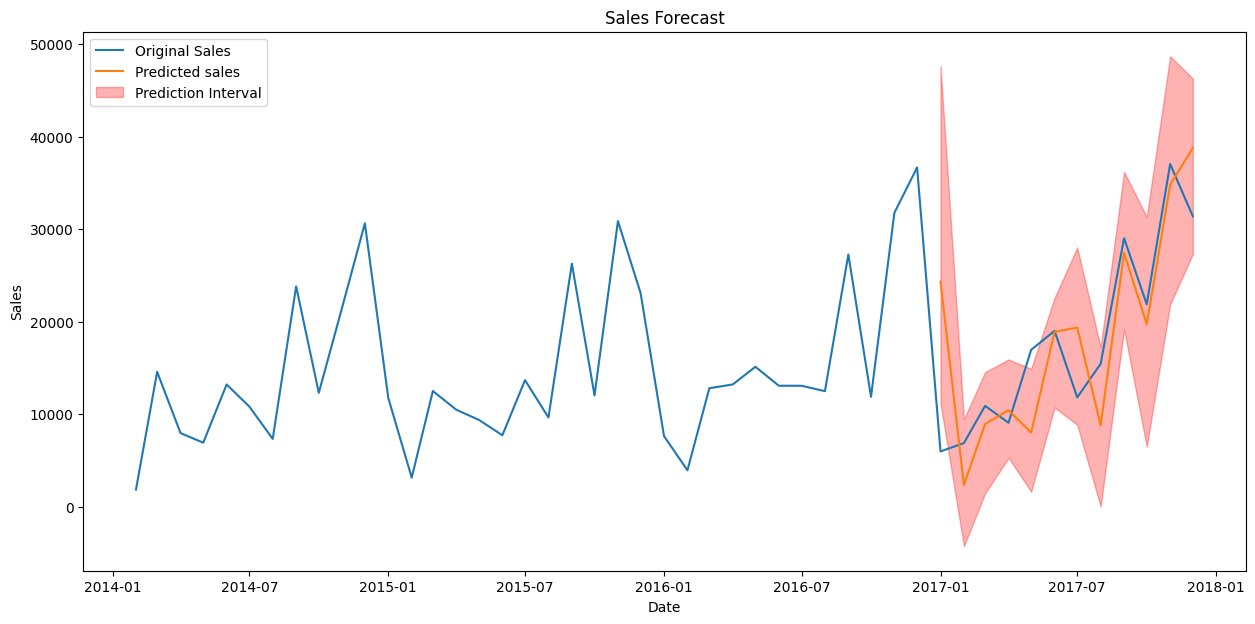

In [300]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label="Original Sales")
plt.plot(predict_frame['Order Date'], predict_frame['xgb_pred'], label="Predicted sales")
plt.fill_between(
    predict_frame['Order Date'], 
    predict_frame['Upper Bound_xgb'], 
    predict_frame['Lower Bound_xgb'], 
    color='red', 
    alpha=0.3, 
    label="Prediction Interval"
)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()